# Implementation 9 - kNN, Decision Tree, SVM

In [126]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn 

## Importing the data set

In [127]:
dataset = pd.read_csv('Social_Network_Ads.csv')

In [128]:
dataset.head(10)

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,no
1,15810944,Male,35,20000,no
2,15668575,Female,26,43000,no
3,15603246,Female,27,57000,no
4,15804002,Male,19,76000,no
5,15728773,Male,27,58000,no
6,15598044,Female,27,84000,no
7,15694829,Female,32,150000,yes
8,15600575,Male,25,33000,no
9,15727311,Female,35,65000,no


## Inspecting the data set

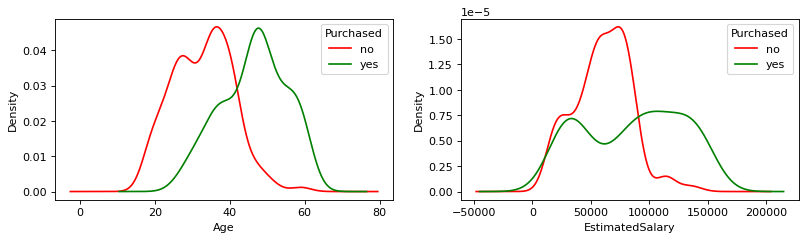

In [129]:
feature_list = ['Age', 'EstimatedSalary']

fig, axs = plt.subplots(1,len(feature_list), figsize=(12,3), dpi= 80)
for i_axs in range(len(feature_list)):
    for i_purchase, purchase in enumerate(['no', 'yes']):
        (dataset[feature_list[i_axs]][dataset['Purchased']==purchase]).plot(kind='density', label=purchase, c=['red', 'green'][i_purchase], ax=axs[i_axs])
    axs[i_axs].set_xlabel(feature_list[i_axs])
    axs[i_axs].legend(title='Purchased')
plt.show()   

## Preparing the data set

In [130]:
X = dataset[['Age', 'EstimatedSalary']].values

**Encoding:**

In [131]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
y = label_encoder.fit_transform(dataset['Purchased'])

**Train-test split:**

In [132]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (300, 2) (300,)
Test set: (100, 2) (100,)


**Feature scaling:**

In [133]:
# summarize numpy array
def summarize(X):
    print ('mean = %.3f, std = %.3f, min = %.3f, max = %.3f' % (np.mean(X), np.std(X), np.min(X), np.max(X)))

summarize(X_test[:,0])

mean = 36.240, std = 11.397, min = 18.000, max = 60.000


In [134]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [135]:
summarize(X_test[:,0])

mean = -0.187, std = 1.129, min = -1.993, max = 2.166


## Training a logistic regression model

In [136]:
from sklearn.linear_model import LogisticRegression

log_reg = {'classifier': LogisticRegression()}
# log_reg = {'classifier': LogisticRegression(C=0.01, solver='liblinear')}
log_reg['classifier'].fit(X_train, y_train)

LogisticRegression()

We can check what prediction is made on some examples:

In [137]:
print(label_encoder.inverse_transform(log_reg['classifier'].predict(sc.transform([[30,200000]]))))

['yes']


In [138]:
print(label_encoder.inverse_transform(log_reg['classifier'].predict(sc.transform([[30,100000]]))))

['no']


## Training a k-NN model

In [139]:
from sklearn.neighbors import KNeighborsClassifier
# knn = {'classifier': KNeighborsClassifier(n_neighbors = 4, metric = 'euclidean')}
knn = {'classifier': KNeighborsClassifier(n_neighbors = 15, metric = 'euclidean')}
# knn = {'classifier': KNeighborsClassifier(n_neighbors = 100, metric = 'euclidean')}
knn['classifier'].fit(X_train, y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=15)

In [140]:
print(label_encoder.inverse_transform(knn['classifier'].predict(sc.transform([[30,200000]]))))

['yes']


In [141]:
print(label_encoder.inverse_transform(knn['classifier'].predict(sc.transform([[30,100000]]))))

['no']


## Training a Decision Tree model

In [142]:
from sklearn.tree import DecisionTreeClassifier
# dt = {'classifier': DecisionTreeClassifier(criterion = 'entropy', random_state = 0)}
dt = {'classifier': DecisionTreeClassifier(criterion = 'entropy', random_state = 0, max_depth = 4)}
dt['classifier'].fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=0)

In [143]:
print(label_encoder.inverse_transform(dt['classifier'].predict(sc.transform([[30,200000]]))))

['yes']


In [144]:
print(label_encoder.inverse_transform(dt['classifier'].predict(sc.transform([[30,100000]]))))

['yes']


## Training a SVM model

In [145]:
from sklearn.svm import SVC
svm = {'classifier': SVC(kernel = 'linear', random_state = 0, probability = True)}
# svm = {'classifier': SVC(kernel = 'rbf', random_state = 0, probability = True)}
svm['classifier'].fit(X_train, y_train)

SVC(kernel='linear', probability=True, random_state=0)

In [146]:
print(label_encoder.inverse_transform(svm['classifier'].predict(sc.transform([[30,200000]]))))

['yes']


In [147]:
print(label_encoder.inverse_transform(svm['classifier'].predict(sc.transform([[30,100000]]))))

['no']


In [148]:
model_list = [log_reg, knn, dt, svm]

## Making predictions

**Probability of purchasing:**

In [149]:
log_reg['y_proba'] = log_reg['classifier'].predict_proba(X_test)
log_reg['y_proba'][:10]

array([[0.88725351, 0.11274649],
       [0.83324206, 0.16675794],
       [0.80549253, 0.19450747],
       [0.91056209, 0.08943791],
       [0.90253903, 0.09746097],
       [0.99212979, 0.00787021],
       [0.9848589 , 0.0151411 ],
       [0.26779092, 0.73220908],
       [0.99419108, 0.00580892],
       [0.49579544, 0.50420456]])

In [150]:
knn['y_proba'] = knn['classifier'].predict_proba(X_test)
knn['y_proba'][:10]

array([[0.93333333, 0.06666667],
       [1.        , 0.        ],
       [0.86666667, 0.13333333],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [1.        , 0.        ],
       [0.2       , 0.8       ]])

In [151]:
dt['y_proba'] = dt['classifier'].predict_proba(X_test)
dt['y_proba'][:10]

array([[1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [1.        , 0.        ],
       [0.57142857, 0.42857143]])

In [152]:
svm['y_proba'] = svm['classifier'].predict_proba(X_test)
svm['y_proba'][:10]

array([[0.87256648, 0.12743352],
       [0.83739142, 0.16260858],
       [0.79479061, 0.20520939],
       [0.90074611, 0.09925389],
       [0.90329225, 0.09670775],
       [0.9923935 , 0.0076065 ],
       [0.98590055, 0.01409945],
       [0.21854536, 0.78145464],
       [0.99308966, 0.00691034],
       [0.52478082, 0.47521918]])

**Storing the the probabilities for the positive class in a separate variable**

In [153]:
for model in model_list:
    model['y_proba_positive'] = model['y_proba'][:,1]

**Prediction of the class and comparison with the true one:**

In [154]:
log_reg['y_pred'] = log_reg['classifier'].predict(X_test)

In [155]:
knn['y_pred'] = knn['classifier'].predict(X_test)

In [156]:
dt['y_pred'] = dt['classifier'].predict(X_test)

In [157]:
svm['y_pred'] = svm['classifier'].predict(X_test)

## Performance assessment

**Confusion matrix:**

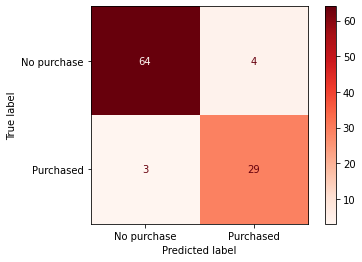

In [158]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

cm = confusion_matrix(y_test, knn['y_pred'])
_ = ConfusionMatrixDisplay(cm, display_labels=["No purchase", "Purchased"]).plot(cmap="Reds")

**Accuracy, precision, recall:**

In [159]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

def compute_metrics(classifier_data, y_test):
    model_name = classifier_data['classifier'].__class__.__name__
    
    accuracy = round(accuracy_score(y_test, classifier_data['y_pred']), 2)
    precision = round(precision_score(y_test, classifier_data['y_pred']),2)
    recall = round(recall_score(y_test, classifier_data['y_pred']),2)
    f1 = round(f1_score(y_test, classifier_data['y_pred']), 2)
    auc = round(roc_auc_score(y_test, classifier_data['y_proba_positive']), 2)
    
    print('Model: ' + model_name)
    print('-' * 80)
    print('Accuracy (proportion of correct predictions) is ' + str(accuracy))
    print('Precision (proportion of true purchases among purchase predictions) is ' + str(precision))
    print('Recall (proportion of true purchases that are correctly predicted) is ' + str(recall))
    print('F1 score (combination of precision and recall) is ' + str(f1))
    print('Area Under the Curve (AUC) is ' + str(auc))
    return pd.DataFrame({
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 score': f1,
        'AUC score': auc
    }, index=[model_name])

In [160]:
log_reg['metrics'] = compute_metrics(log_reg, y_test)

Model: LogisticRegression
--------------------------------------------------------------------------------
Accuracy (proportion of correct predictions) is 0.89
Precision (proportion of true purchases among purchase predictions) is 0.89
Recall (proportion of true purchases that are correctly predicted) is 0.75
F1 score (combination of precision and recall) is 0.81
Area Under the Curve (AUC) is 0.95


In [161]:
knn['metrics'] = compute_metrics(knn, y_test)

Model: KNeighborsClassifier
--------------------------------------------------------------------------------
Accuracy (proportion of correct predictions) is 0.93
Precision (proportion of true purchases among purchase predictions) is 0.88
Recall (proportion of true purchases that are correctly predicted) is 0.91
F1 score (combination of precision and recall) is 0.89
Area Under the Curve (AUC) is 0.97


In [162]:
dt['metrics'] = compute_metrics(dt, y_test)

Model: DecisionTreeClassifier
--------------------------------------------------------------------------------
Accuracy (proportion of correct predictions) is 0.93
Precision (proportion of true purchases among purchase predictions) is 0.9
Recall (proportion of true purchases that are correctly predicted) is 0.88
F1 score (combination of precision and recall) is 0.89
Area Under the Curve (AUC) is 0.98


In [163]:
svm['metrics'] = compute_metrics(svm, y_test)

Model: SVC
--------------------------------------------------------------------------------
Accuracy (proportion of correct predictions) is 0.9
Precision (proportion of true purchases among purchase predictions) is 0.92
Recall (proportion of true purchases that are correctly predicted) is 0.75
F1 score (combination of precision and recall) is 0.83
Area Under the Curve (AUC) is 0.95


**ROC curve:**

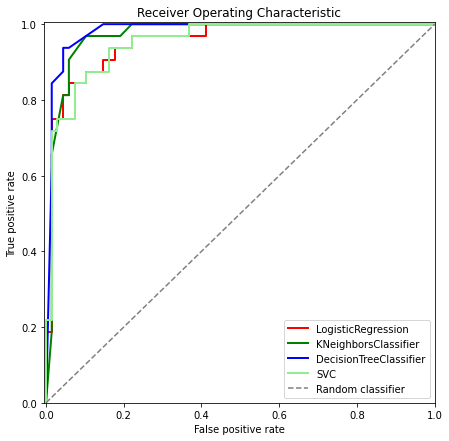

In [164]:
from sklearn.metrics import roc_curve

plt.subplots(1, figsize=(7,7))
plt.title('Receiver Operating Characteristic')
colors = ['red', 'green', 'blue', 'lightgreen']

# Plot ROC curve of each model
for i, model in enumerate(model_list):
    model_name = model['classifier'].__class__.__name__
    model['y_proba_positive'] = model['y_proba'][:,1]
    false_positive_rate, true_positive_rate, threshold = roc_curve(y_test, model['y_proba_positive'])
    plt.plot(false_positive_rate, true_positive_rate, c=colors[i], linewidth=2, label=model_name)

# Plot ROC curve for a random classifier
plt.plot([0, 1], ls='--', c='grey', label='Random classifier')

# Formatting
plt.xlim([-0.005, 1])
plt.ylim([0, 1.005])
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')
plt.legend()
plt.show()

### Comparing to the metrics 

In [165]:
pd.concat([model['metrics'] for model in model_list])

,Accuracy,Precision,Recall,F1 score,AUC score
LogisticRegression,0.89,0.89,0.75,0.81,0.95
KNeighborsClassifier,0.93,0.88,0.91,0.89,0.97
DecisionTreeClassifier,0.93,0.90,0.88,0.89,0.98
SVC,0.90,0.92,0.75,0.83,0.95


## Plotting class domains

**On test set**

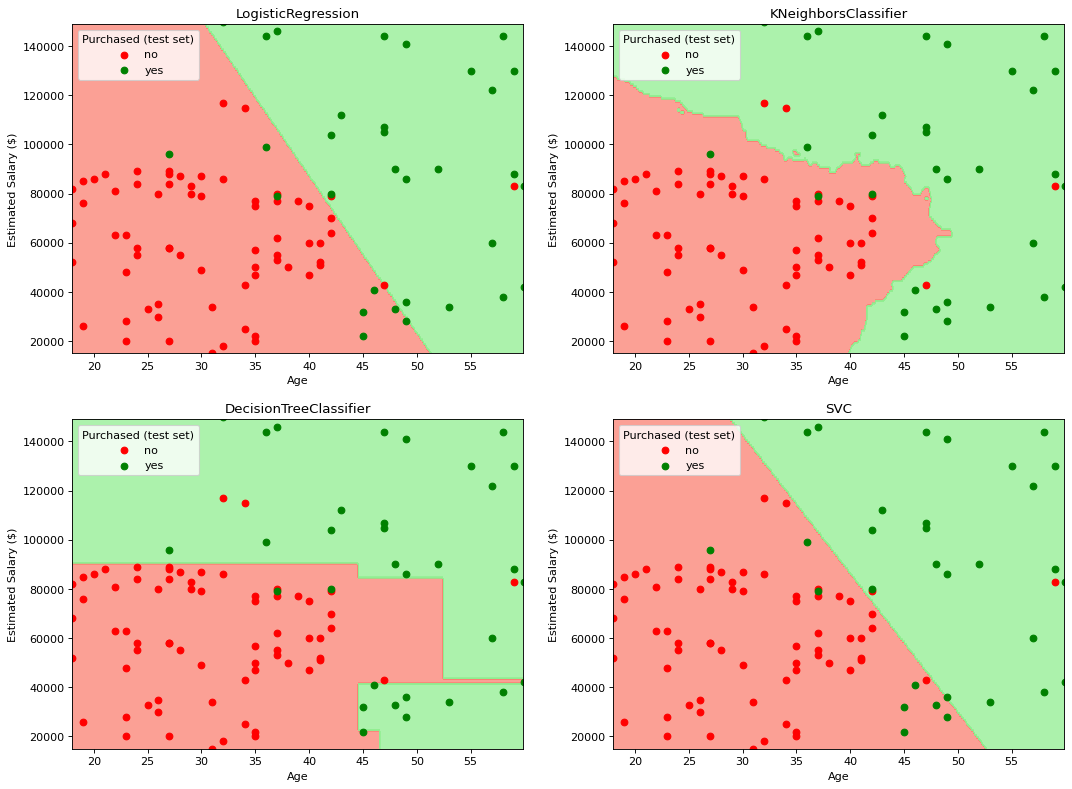

In [166]:
classifier_list = [log_reg, knn, dt, svm]

from matplotlib.colors import ListedColormap

# Prepare feature grid
fig, axs = plt.subplots(2, 2, figsize=(16,12), dpi= 80)
X_set, y_set = sc.inverse_transform(X_test), label_encoder.inverse_transform(y_test)
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min(), stop = X_set[:, 0].max(), step = 0.1),
    np.arange(start = X_set[:, 1].min(), stop = X_set[:, 1].max(), step = 1000))
positions = [(0,0), (0,1), (1,0), (1,1)]

# Loop on classifier 
for i, classifier in enumerate(classifier_list):
    i_axs = positions[i]
    axs[i_axs].contourf(X1, X2, classifier['classifier'].predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
                 alpha = 0.75, cmap = ListedColormap(('salmon', 'lightgreen')))
    
    for i, j in enumerate(np.unique(y_set)):
        axs[i_axs].scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], color = ListedColormap(('red', 'green'))(i), label = j)
    
    axs[i_axs].set_xlim(X1.min(), X1.max())
    axs[i_axs].set_ylim(X2.min(), X2.max())
    axs[i_axs].legend(title='Purchased (test set)')
    axs[i_axs].set_title(str(classifier['classifier'].__class__.__name__))
    axs[i_axs].set_xlabel('Age')
    axs[i_axs].set_ylabel('Estimated Salary ($)')

plt.show() 